In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [19]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-06-21-170608/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-06-21-170608/log\\2019-06-21.csv',
 '../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-06-21-170608/log\\2019-06-22.csv']

In [21]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(31302, 4)
(78369, 4)


In [22]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [25]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(109671, 168)

In [26]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.954266,-0.964761,-0.289558,-0.889086,0.265809,-0.201466,0.977999,0.513066,0.902843,0.887528,...,0.286489,-0.263884,-0.093896,-0.881885,0.871941,-0.134020,0.557407,-0.498847,0.500923,0.144252
2,0.954266,-0.964761,-0.289558,-0.889086,0.265809,-0.201466,0.977999,0.513066,0.902843,0.887528,...,0.286489,-0.263884,-0.093896,-0.881885,0.871941,-0.134020,0.557407,-0.498847,0.500923,0.144252
3,0.954266,-0.964761,-0.289558,-0.889086,0.265809,-0.201466,0.977999,0.513066,0.902843,0.887528,...,0.286489,-0.263884,-0.093896,-0.881885,0.871941,-0.134020,0.557407,-0.498847,0.500923,0.144252
4,0.962576,-0.884616,-0.401076,-0.915110,0.134362,-0.179460,0.975120,0.315981,0.863797,0.745468,...,0.205748,-0.625103,-0.270328,-0.877704,0.757671,-0.036855,0.101370,-0.444049,0.473830,0.047816
5,0.981347,-0.669227,-0.318930,-0.896168,0.554727,0.065543,0.941892,-0.251561,0.633100,0.784604,...,-0.394125,-0.617631,-0.226929,-0.889961,0.777734,0.125571,-0.131044,-0.240086,0.519485,-0.277956
6,0.994194,-0.016682,-0.237043,0.831528,0.798655,-0.713892,0.104763,-0.753198,-0.787262,0.775692,...,-0.989100,0.591182,0.829479,-0.985009,0.767947,-0.165057,0.578261,0.223633,-0.219519,-0.940586
7,0.989788,-0.655237,-0.281796,-0.546091,0.681035,0.039136,0.932116,-0.315464,0.550802,0.906125,...,-0.824641,0.333365,0.165060,-0.956085,0.931764,0.079757,0.356351,-0.039221,0.333076,-0.604876
8,0.939853,-0.920786,-0.292506,-0.647818,0.397543,-0.698933,0.797509,-0.213447,0.410742,0.687894,...,-0.574954,-0.652468,-0.967055,-0.835345,0.801928,0.184551,0.917345,-0.660872,0.752769,0.530571
9,0.954266,-0.964761,-0.289558,-0.889086,0.265809,-0.201466,0.977999,0.513066,0.902843,0.887528,...,0.286489,-0.263884,-0.093896,-0.881885,0.871941,-0.134020,0.557407,-0.498847,0.500923,0.144252


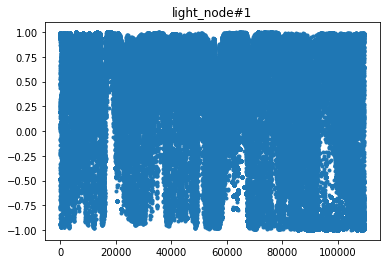

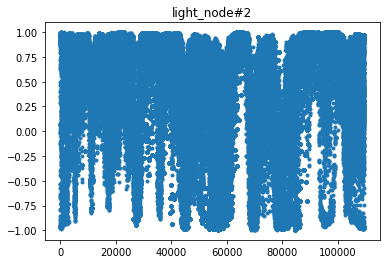

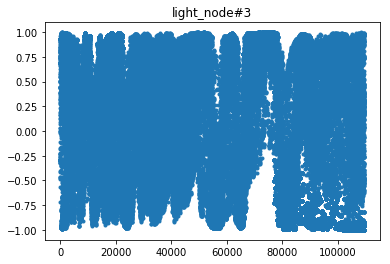

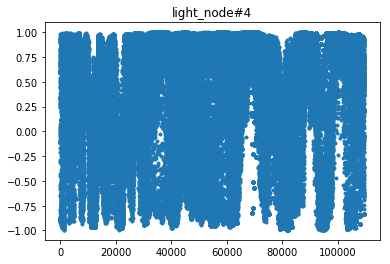

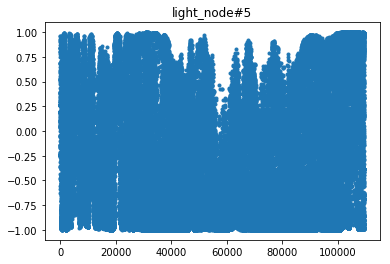

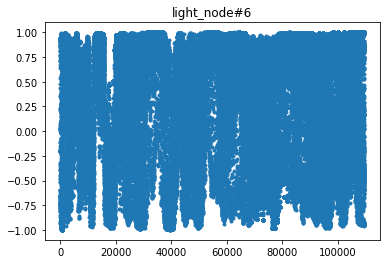

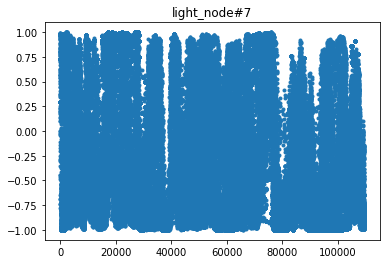

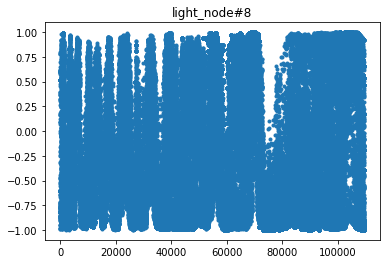

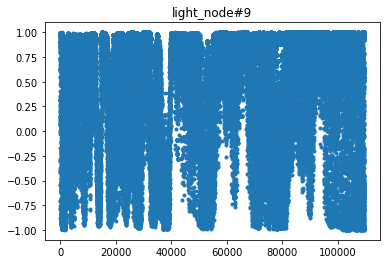

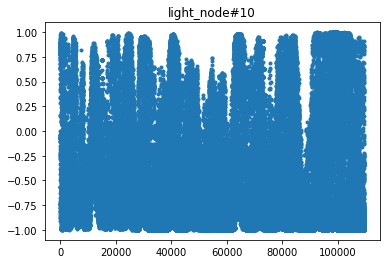

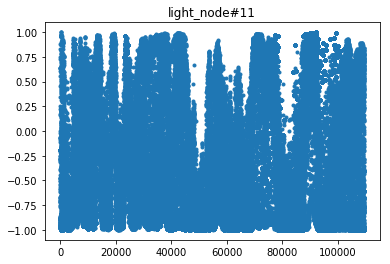

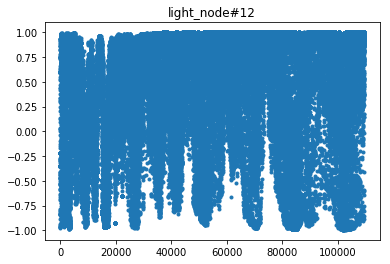

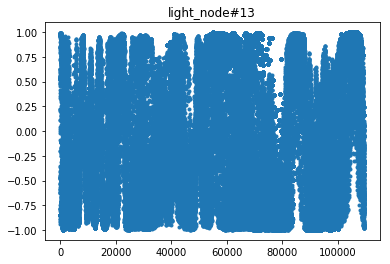

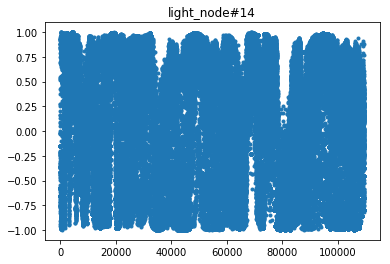

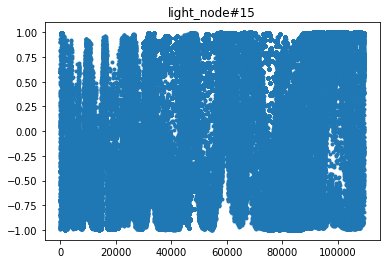

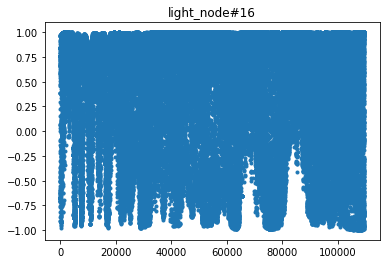

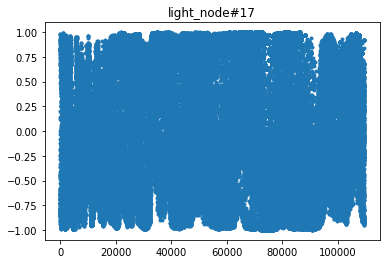

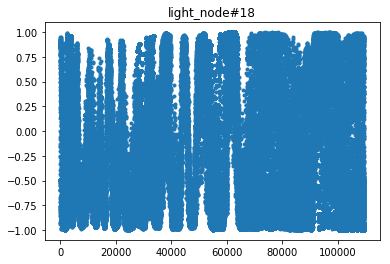

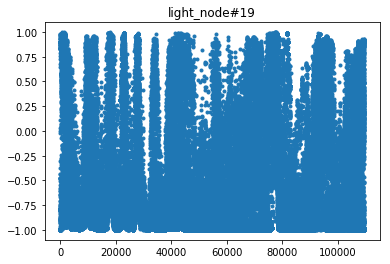

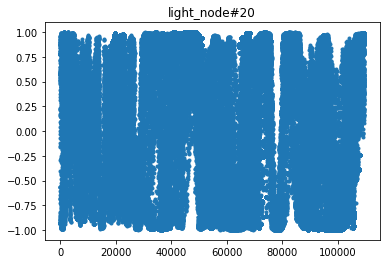

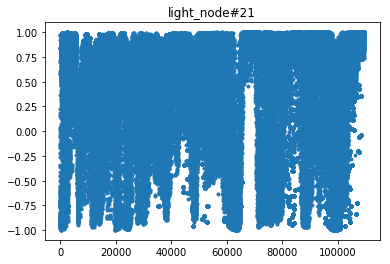

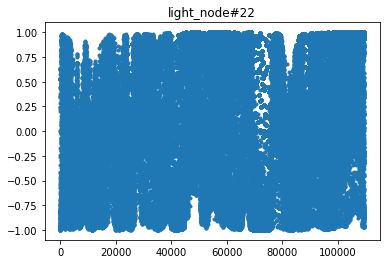

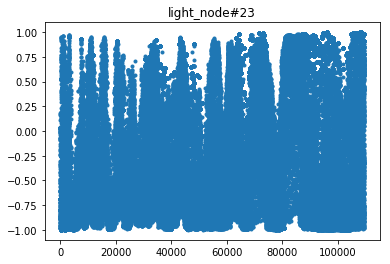

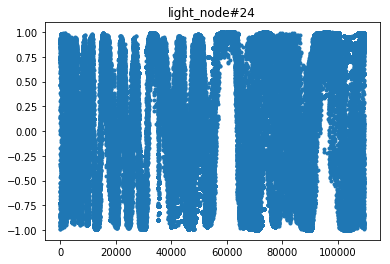

In [37]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

In [32]:
Agent_1_action_df.index

RangeIndex(start=0, stop=109671, step=1)